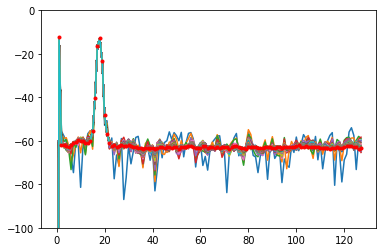

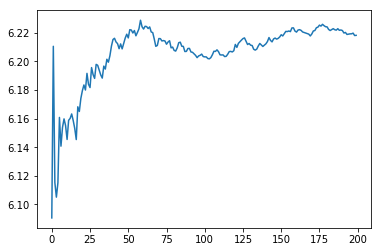

In [ ]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import math

N= 256
Fs= 10000
Fc = 600
M=200
C= 1

def SNR_WLeak_fix (spec_signal, tol):
    fund = np.argmax(spec_signal)
    SP_noise=0
    SP_signal=0
    for i in range(len(spec_signal)):
        SP_noise+=spec_signal[i]**2
    limit = tol/100 * spec_signal[fund]
    L=0;
    while(spec_signal[fund-L]>=limit):
        L+=1
    H=0;
    while(spec_signal[fund+H]>=limit):
        H+=1
    for i in range(-L, H):
        SP_signal += (spec_signal[fund+i]**2)
    SP_signal = SP_signal*2
    SP_noise -= SP_signal
    SNR = 10*math.log10(SP_signal/SP_noise)
    return SNR

acc_spec = np.zeros(N)
av_spec = np.zeros(N)
Zeros = 20
#z = np.zeros(Zeros)
#w = sig.flattop(N-Zeros*2)
#w = sig.hanning(N+40)
w = sig.windows.hann(N+40)
#w = np.ones(N-Zeros*2)
#w = np.concatenate((z,w,z),axis=0)
SNR_it = np.zeros(M)
t = np.arange(0, N/Fs, 1/Fs)
plt.figure(1)
plt.ylim((-100,0))
for i in range(M):
    noise = np.random.normal(0,0.05,N)
    noise -= np.mean(noise)
    signal = 1 * np.sin(2*np.pi*Fc*(t+i*N/(2*Fs))) + C + noise
    zer = np.zeros(20)
    signal2 = np.concatenate((zer,signal,zer),axis=0)
    wsig = w*signal2
    wsig -=np.mean(wsig)
    #wsig = np.copy(signal)
    spec = (abs(fft(wsig)))
    for j in range(N):
        acc_spec[j]+=spec[j]
    av_spec = np.copy(acc_spec)
    av_spec /= ((i+1)*N)
    plt.plot(10*np.log(av_spec[0:int(N/2)]))
    SNR_it[i] = SNR_WLeak_fix(av_spec,10)

plt.plot(10*np.log(av_spec[0:int(N/2)]),'r.')
plt.figure(2)
plt.plot(SNR_it)

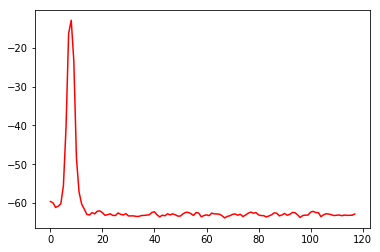

In [ ]:
plt.plot(10*np.log(av_spec[10:int(N/2)]),'r')